# Simulation of self-avoiding walk

## 1. Markov Chain Monte Carlo

Describe MCMC

### 1.1. The Metropolis-Hastings algorithm

The Metropolis-Hastings algorithm allows us to sample from a distribution $\pi$ on a state space $\Omega$ using only an unnormalized version $f$ of $\pi$. This is useful when $\pi$ is a Gibbs-type distribution of the form
$$\pi(\omega) = \frac{1}{Z} \; f(\omega),$$
for which the *partition function*
$$Z = \sum_{\omega\in\Omega} f(\omega)$$
can be difficult to compute when $\Omega$ is large.

The algorithm presupposes a choice of irreducible Markov chain on $\Omega$ with transition matrix $P$. Given such a choice of $P$, we define an $\Omega \times \Omega$ matrix $Q$ via
$$
Q(\omega, \omega') =
\begin{cases}
P(\omega, \omega'), & \omega \ne \omega', r(\omega, \omega') \ge 1 \\
P(\omega, \omega') r(\omega, \omega'), & \omega \ne \omega', r(\omega, \omega') < 1 \\
P(\omega, \omega')
    + \sum_{\tilde\omega : r(\omega, \tilde\omega) < 1}
       P(\omega, \tilde\omega) (1 - r(\omega, \tilde\omega)), & \omega = \omega'
\end{cases},
$$
where the *acceptance ratio* $r(\omega, \omega')$ is given by
$$
r(\omega, \omega')
    = \frac{\pi(\omega') P(\omega', \omega)}{\pi(\omega) P(\omega, \omega')}
    = \frac{f(\omega') P(\omega', \omega)}{f(\omega) P(\omega, \omega')}.
$$

It is straightforward to verify that $Q$ defines an irreducible, reversible Markov chain $X = (X_n)_{n \ge 0}$ on $\Omega$ with stationary distribution $\pi$; thus,
$$X_n \Rightarrow X_\infty, \quad n\to\infty$$
where $X \sim \pi$.

## 2. The self-avoiding walk

The self-avoiding walk is a model of a linear polymer in a good solution. The microcanonical ensemble on walks of fixed length $n$ is given by the uniform measure $\pi = \pi_n$ on the collection $\Omega = \Omega_n$ of nearest-neighbour paths on $\mathbb{Z}^d$. That is,
$$\pi(\omega) = \frac{1}{c_n},$$
where $c_n = |\Omega_n|$.

The self-avoiding walk has been implemented as a class `saw` in the module `saw`. Let's
create an instance `s` of this class with 100 steps:

In [2]:
import saw

In [23]:
s = saw.saw(100)

The walk is initialized as a straight line, which we can plot using `saw.plotwalk`. First, let's make sure we can view plots inline in this notebook:

In [4]:
%matplotlib inline

We'll run `saw.plotwalk` with the option `'-'` to hide the vertices (since the walk is somewhat long).

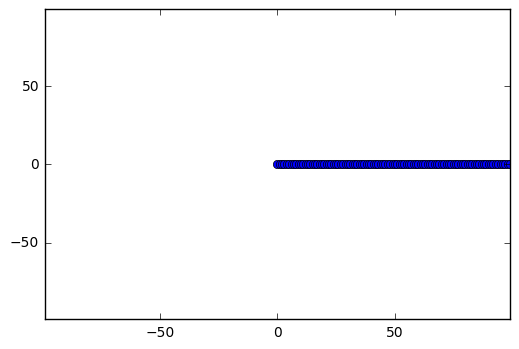

In [24]:
saw.plotwalk(s)

### 2.1. The pivot algorithm

The pivot algorithm is a MCMC algorithm for sampling from $\pi$. The transition matrix is given by
$$P(\omega, T(\omega)) = \frac{1}{2dn},$$
for any *pivot transformation* $T = T_{i,r}$: that is, $T(\omega)$ is the walk obtained from $\omega$ by applying a lattice rotation $r$ to the segment of $\omega$ with steps from $i, \ldots, n$. If $\omega' \ne T(\omega)$ for all such $T$, then $P(\omega, \omega') = 0$.

It is straightforward to see that $P$ is an irreducible, reversible Markov chain with stationary distribution $\pi$.

We can pivot our walk `s` using the method `s.pivot`. First, we need a $2 \times 2$ rotation matrix. We can construct such a matrix `r` using numpy:

In [7]:
import numpy as np
r = np.array([[0, 1], [-1, 0]])

Then we can pivot the walk about step 50 with the method `s.pivot`:

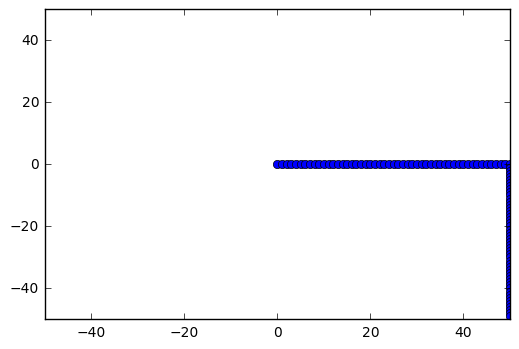

In [17]:
s.pivot(50, r);
saw.plotwalk(s)

We can run the pivot algorithm for 1000 iterations using `saw.saw.mix`. Let's do this using a new walk `t`:

In [18]:
t = saw.saw(100)
t.mix(1000)

Iteration 100

Iteration 200

Iteration 300

Iteration 400

Iteration 500

Iteration 600

Iteration 700

Iteration 800

Iteration 900



This time, let's plot the walk with the option `'-'` to hide the vertices:

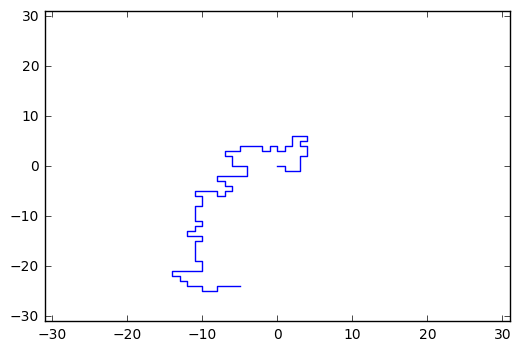

In [22]:
saw.plotwalk(t, '-')

## 3. The Domb-Joyce model

Describe the model

### 3.2. Simuling the Domb-Joyce model

Let $\Omega = \Omega_n$ be the collection of $n$-step nearest-neighbour walks. Suppose we wish to sample from the Domb-Joyce measure $\pi = \pi_{g,n}$ on $\Omega$, given by
$$\pi(\omega) = \frac{1}{c_n} f(\omega), \quad f(\omega) = e^{-g I(\omega)}.$$
We will accomplish using the Metropolis algorithm, where our choice of underlying Markov chain $P$ is given by the pivot algorithm.

Namely, we generate the Markov chain with transition matrix $Q$ given by
$$
Q(\omega, \omega') = \frac{1}{2dn}
\begin{cases}
1, & \omega \ne \omega', r(\omega, \omega') \ge 1 \\
r(\omega, \omega'), & \omega \ne \omega', r(\omega, \omega') < 1 \\
1 + \sum_{\tilde\omega : r(\omega, \tilde\omega) < 1} (1 - r(\omega, \tilde\omega)),
    & \omega = \omega'
\end{cases},
$$
where
$$r(\omega, \omega') = e^{-g (I(\omega') - I(\omega))}.$$
Note that
$$r(\omega, \omega') \ge 1 \Leftrightarrow I(\omega') \le I(\omega).$$

Implement the Metropolis algorithm for Domb-Joyce

## References

1. Diaconis, P.: The Markov Chain Monte Carlo Revolution. Bull. Amer. Math. Soc. (N.S.) **46**, 179-205 (2009)
2. Madras, N. and Slade, G.: The Self-Avoiding Walk, Birkhauser, Boston, (1993)